In [35]:
import pandas as pd
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

results = pd.read_csv('testResults.txt', sep=",")


In [36]:
results.drop('precision', axis=1, inplace=True)
results.drop('fwd_algo', axis=1, inplace=True)
results

,w,h,c,n,k,f_w,f_h,pad_w,pad_h,stride_w,stride_h,fwd_time(usec),bwd_inputs_time(usec),bwd_params_time(usec),total_time(usec)
0,700,161,1,4,32,20,5,0,0,2,2,107,372,910,1389
1,700,161,1,8,32,20,5,0,0,2,2,142,712,1157,2011
2,700,161,1,16,32,20,5,0,0,2,2,254,1391,1682,3327
3,700,161,1,32,32,20,5,0,0,2,2,481,2752,2732,5965
4,341,79,32,4,32,10,5,0,0,2,2,353,1399,777,2529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,14,14,1024,16,512,1,1,0,0,2,2,139,182,151,472
90,7,7,512,16,512,3,3,1,1,1,1,326,322,213,861
91,7,7,512,16,2048,1,1,0,0,1,1,163,302,210,675
92,14,14,1024,16,2048,1,1,0,0,2,2,312,490,415,1217


In [67]:
np.random.seed(0)
x = results.iloc[:, results.columns != 'total_time(usec)']
y = results['total_time(usec)']

#tmp
features = ['w', 'h', 'c','n', 'k', 'f_w']
x = results[features]

polynomial_features= PolynomialFeatures(degree=len(x.columns))

x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict([x_poly])

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)
for f in features:
    plt.scatter(x[f], y_poly_pred, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x[f],y_poly_pred), key=sort_axis)
    x[f], y_poly_pred = zip(*sorted_zip)
    plt.plot(x[f], y_poly_pred, color='m')
    plt.xlabel(f)
    plt.ylabel('execution time')
    plt.show()

[[1.000000e+00 7.000000e+02 1.610000e+02 ... 1.638400e+08 1.024000e+08
  6.400000e+07]
 [1.000000e+00 7.000000e+02 1.610000e+02 ... 1.638400e+08 1.024000e+08
  6.400000e+07]
 [1.000000e+00 7.000000e+02 1.610000e+02 ... 1.638400e+08 1.024000e+08
  6.400000e+07]
 ...
 [1.000000e+00 7.000000e+00 7.000000e+00 ... 4.194304e+06 2.048000e+03
  1.000000e+00]
 [1.000000e+00 1.400000e+01 1.400000e+01 ... 4.194304e+06 2.048000e+03
  1.000000e+00]
 [1.000000e+00 7.000000e+00 7.000000e+00 ... 2.621440e+05 5.120000e+02
  1.000000e+00]]


AttributeError: 'numpy.ndarray' object has no attribute 'append'

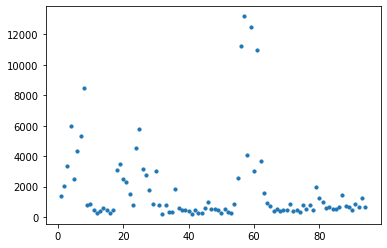

In [56]:
plt.scatter(range(1,95), y, s=10)
plt.show()

In [70]:
test = polynomial_features.transform(np.array([[523, 288, 132, 12, 120, 3]]))

model.predict(test)

array([2893620.27206757])